# Step One 

In [1]:
import pandas as pd

df = pd.read_csv("./cybersecurity_attacks.csv")

print(df.head())
print(df.info())
print(df.describe())
print(df.columns)




             Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data  ... Action Taken  \
0  Qui natus

# Step Two

In [2]:
# Return only duplicated rows
print(df[df.duplicated()])

Empty DataFrame
Columns: [Timestamp, Source IP Address, Destination IP Address, Source Port, Destination Port, Protocol, Packet Length, Packet Type, Traffic Type, Payload Data, Malware Indicators, Anomaly Scores, Alerts/Warnings, Attack Type, Attack Signature, Action Taken, Severity Level, User Information, Device Information, Network Segment, Geo-location Data, Proxy Information, Firewall Logs, IDS/IPS Alerts, Log Source]
Index: []

[0 rows x 25 columns]


# Step Three

In [3]:
df = df.fillna({
    'Malware Indicators' : 'IoC undetacted',
    'Alerts/Warnings' : 'Alert Unawarenessn',
    'Proxy Information' : 'anonymous',
    'Firewall Logs' : 'NO Data',
    'IDS/IPS Alerts' : 'Alert Unawarenessn'
})
df.isnull().sum()

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

# Step Four 

In [4]:
for col in df.columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts().reset_index().head(10))
    print("-" * 40)

Value counts for column: Timestamp
             Timestamp  count
0  2022-04-17 20:05:34      2
1  2022-06-11 14:28:15      2
2  2022-06-06 12:12:43      2
3  2023-06-27 11:02:56      1
4  2021-08-15 22:29:04      1
5  2022-07-20 13:28:50      1
6  2022-06-26 15:15:50      1
7  2020-09-30 21:35:31      1
8  2022-10-05 16:59:46      1
9  2021-05-29 15:33:51      1
----------------------------------------
Value counts for column: Source IP Address
  Source IP Address  count
0     103.216.15.12      1
1    78.199.217.198      1
2      63.79.210.48      1
3     163.42.196.10      1
4     71.166.185.76      1
5     198.102.5.160      1
6     97.253.103.59      1
7      11.48.99.245      1
8     49.32.208.167      1
9   114.109.149.113      1
----------------------------------------
Value counts for column: Destination IP Address
  Destination IP Address  count
0           84.9.164.252      1
1         66.191.137.154      1
2          198.219.82.17      1
3        101.228.192.255      1
4    

In [5]:

# === Ask the user for filtering criteria ===
severity_level = input("Enter Severity Level (High/Medium/Low or leave blank): ").strip() or None
anomaly_score_min = input("Enter minimum Anomaly Score (or leave blank): ").strip()
traffic_type = input("Enter Traffic Type (or leave blank): ").strip() or None
packet_type = input("Enter Packet Type (or leave blank): ").strip() or None
protocol = input("Enter Protocol (TCP/UDP/ICMP or leave blank): ").strip() or None

# Convert numeric input safely
anomaly_score_min = float(anomaly_score_min) if anomaly_score_min else None

# === Filter ===
filtered_df = df.copy()

if severity_level is not None:
    filtered_df = filtered_df[filtered_df['Severity Level'] == severity_level]

if anomaly_score_min is not None:
    filtered_df = filtered_df[filtered_df['Anomaly Scores'] > anomaly_score_min]

if traffic_type is not None:
    filtered_df = filtered_df[filtered_df['Traffic Type'] == traffic_type]

if packet_type is not None:
    filtered_df = filtered_df[filtered_df['Packet Type'] == packet_type]

if protocol is not None:
    filtered_df = filtered_df[filtered_df['Protocol'] == protocol]

filtered_df.head(100)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,Alert Unawarenessn,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",anonymous,Log Data,Alert Unawarenessn,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",anonymous,NO Data,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NO Data,Alert Data,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-11-24 20:11:15,169.21.155.127,171.38.239.42,47513,9156,UDP,1455,Control,FTP,Rerum maiores sed. Saepe repudiandae dolore sa...,...,Ignored,High,Jivika Lad,Mozilla/5.0 (X11; Linux i686; rv:1.9.7.20) Gec...,Segment C,"Gudivada, Punjab",4.152.115.150,NO Data,Alert Unawarenessn,Firewall
96,2021-12-31 11:46:47,92.192.73.229,72.77.74.9,12215,50585,TCP,640,Control,HTTP,Facere dicta magni corrupti magnam. Aliquam es...,...,Blocked,Medium,Vedika Bawa,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_7_1 rv...,Segment C,"Maheshtala, Chhattisgarh",anonymous,Log Data,Alert Data,Server
97,2021-10-25 04:23:15,129.189.216.143,197.202.27.160,19199,27928,ICMP,1178,Data,HTTP,Eaque deserunt nemo ad voluptate. Aliquid rem ...,...,Ignored,High,Ira Kapadia,Mozilla/5.0 (compatible; MSIE 8.0; Windows 95;...,Segment C,"Tirunelveli, Gujarat",57.192.174.154,Log Data,Alert Data,Server
98,2022-04-25 20:26:30,60.223.224.39,218.187.232.192,26123,7023,ICMP,158,Data,HTTP,In repellendus modi ab. Dolore ex sequi perfer...,...,Ignored,Medium,Ivan Balan,Mozilla/5.0 (iPad; CPU iPad OS 9_3_5 like Mac ...,Segment B,"Raipur, Himachal Pradesh",45.57.200.181,NO Data,Alert Unawarenessn,Server


# Step Five 

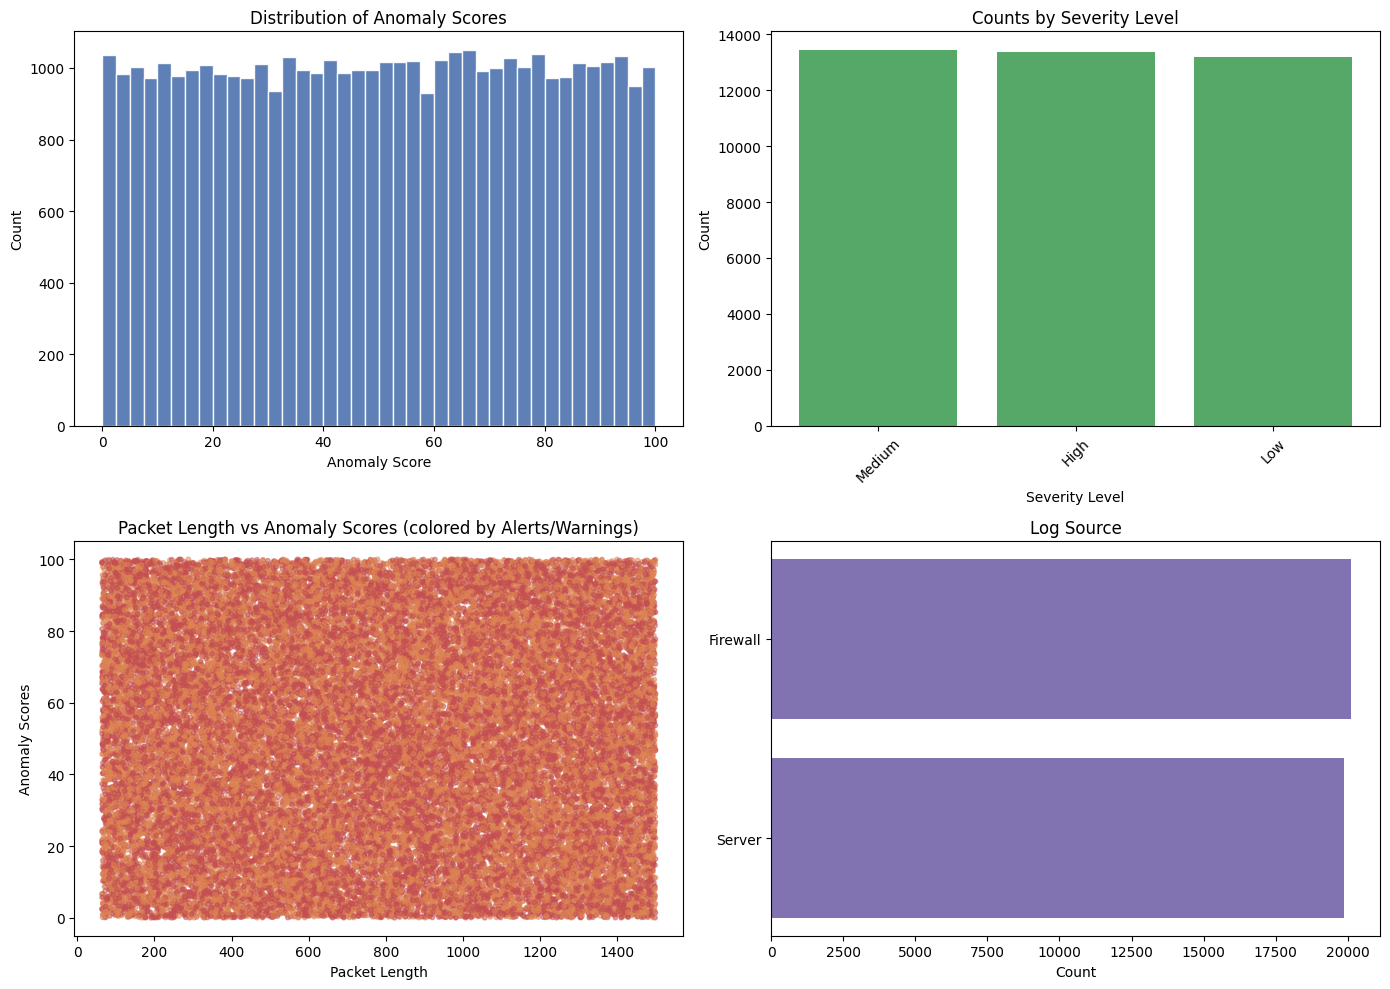

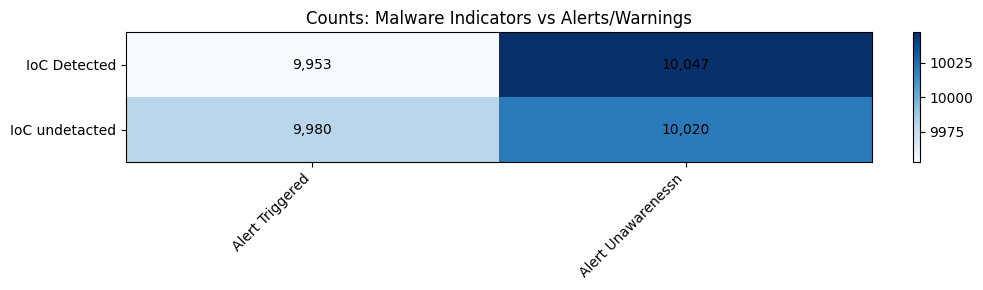

In [6]:
# Visualization cell using existing df, col, matplotlib (plt) and pandas (pd)
import matplotlib.pyplot as plt

# ensure Timestamp is datetime for any time-based visuals
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# 2x2 overview figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
ax1, ax2, ax3, ax4 = axes.ravel()

# 1) Histogram of Anomaly Scores
ax1.hist(df['Anomaly Scores'].dropna(), bins=40, color='#4C72B0', edgecolor='white', alpha=0.9)
ax1.set_title('Distribution of Anomaly Scores')
ax1.set_xlabel('Anomaly Score')
ax1.set_ylabel('Count')

# 2) Severity Level counts (bar)
severity_counts = df['Severity Level'].value_counts()
ax2.bar(severity_counts.index.astype(str), severity_counts.values, color='#55A868')
ax2.set_title('Counts by Severity Level')
ax2.set_xlabel('Severity Level')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

# 3) Scatter: Packet Length vs Anomaly Scores colored by Alerts/Warnings
color_map = {'Alert Triggered': '#C44E52', 'Alert Unawarenessn': '#DD8452'}
colors = df['Alerts/Warnings'].map(color_map).fillna('#7F7F7F')
ax3.scatter(df['Packet Length'], df['Anomaly Scores'], c=colors, s=10, alpha=0.5)
ax3.set_title('Packet Length vs Anomaly Scores (colored by Alerts/Warnings)')
ax3.set_xlabel('Packet Length')
ax3.set_ylabel('Anomaly Scores')


# 4) Log Source
top_logs = df[col].value_counts()
ax4.barh(top_logs.index.astype(str), top_logs.values, color='#8172B2')
ax4.set_title('Log Source')
ax4.set_xlabel('Count')
ax4.invert_yaxis()

plt.tight_layout()
plt.show()

# Separate figure: heatmap of Malware Indicators vs Alerts/Warnings counts
ct = pd.crosstab(df['Malware Indicators'], df['Alerts/Warnings'])

fig, ax = plt.subplots(figsize=(10, max(3, 0.25 * len(ct))))
im = ax.imshow(ct.values, cmap='Blues', aspect='auto')

# ticks and labels
ax.set_xticks(range(len(ct.columns)))
ax.set_xticklabels(ct.columns, rotation=45, ha='right')
ax.set_yticks(range(len(ct.index)))
ax.set_yticklabels(ct.index)
ax.set_title('Counts: Malware Indicators vs Alerts/Warnings')

# annotate cells with values
for i in range(ct.shape[0]):
    for j in range(ct.shape[1]):
        val = ct.iat[i, j]
        ax.text(j, i, f"{int(val):,}", ha='center', va='center', color='black')

plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.04)
plt.tight_layout()
plt.show()

# Step Six 

In [11]:

import pandas as pd

cols_to_onehot = ['Protocol', 'Packet Type', 'Traffic Type', 'Attack Type']

df_oh = pd.get_dummies(
    df,
    columns=cols_to_onehot,
    prefix=cols_to_onehot,
    drop_first=False,    # keep all dummies; set True to drop one per feature
    dummy_na=True        # add a column for NaN
)


In [12]:

if 'num_cols' not in globals():
    num_cols = df.select_dtypes(include='number').columns.tolist()

overwrite = globals().get('overwrite', False)
threshold = globals().get('threshold', 3.0)

if not num_cols:
    raise ValueError('No numeric columns found in df to scale.')

means = df[num_cols].mean()
stds = df[num_cols].std(ddof=0).replace(0, 1.0)

X_scaled = (df[num_cols] - means) / stds

if overwrite:
    df[num_cols] = X_scaled
    if 'df_out' in globals():
        df_out[num_cols] = X_scaled
    display_cols = num_cols
else:
    new_cols = [f'{c}__std' for c in num_cols]
    df[new_cols] = X_scaled.values
    if 'df_out' in globals():
        df_out[new_cols] = X_scaled.values
    display_cols = new_cols + num_cols

df[display_cols].head()

,Source Port__std,Destination Port__std,Packet Length__std,Anomaly Scores__std,Source Port__std__std,Destination Port__std__std,Packet Length__std__std,Anomaly Scores__std__std,max_z__std,Source Port,Destination Port,Packet Length,Anomaly Scores,Source Port__std,Destination Port__std,Packet Length__std,Anomaly Scores__std,max_z
0,-0.094038,-0.836357,-0.669295,-0.743191,-0.094038,-0.836357,-0.669295,-0.743191,-1.936281,31225,17616,503,28.67,-0.094038,-0.836357,-0.669295,-0.743191,0.836357
1,-0.847263,0.808376,0.943535,0.048054,-0.847263,0.808376,0.943535,0.048054,-1.558174,17245,48166,1174,51.50,-0.847263,0.808376,0.943535,0.048054,0.943535
2,-0.870646,1.100929,-1.142808,1.292975,-0.870646,1.100929,-1.142808,1.292975,-0.325398,16811,53600,306,87.42,-0.870646,1.100929,-1.142808,1.292975,1.292975
3,-0.697857,-0.033211,-0.952922,-1.189588,-0.697857,-0.033211,-0.952922,-1.189588,-0.690133,20018,32534,385,15.79,-0.697857,-0.033211,-0.952922,-1.189588,1.189588
4,-1.446071,-0.350205,1.635778,-1.718818,-1.446071,-0.350205,1.635778,-1.718818,1.176915,6131,26646,1462,0.52,-1.446071,-0.350205,1.635778,-1.718818,1.718818


In [13]:
z_abs = X_scaled.abs()

outlier_cols = [f"{c}__is_outlier" for c in num_cols]
df[outlier_cols] = z_abs > threshold

if 'df_out' in globals():
    df_out[outlier_cols] = df[outlier_cols]

df['Any_Outlier'] = df[outlier_cols].any(axis=1)
df['max_z'] = z_abs.max(axis=1)
df['max_z_col'] = z_abs.idxmax(axis=1)

if 'df_out' in globals():
    df_out[['Any_Outlier', 'max_z', 'max_z_col']] = df[['Any_Outlier', 'max_z', 'max_z_col']]

print("Outlier counts (per column + any):")
print(df[outlier_cols + ['Any_Outlier']].sum())

# show top rows by max z (outliers first if any)
display(df.sort_values('max_z', ascending=False).head(10))


Outlier counts (per column + any):
Source Port__is_outlier                0
Destination Port__is_outlier           0
Packet Length__is_outlier              0
Anomaly Scores__is_outlier             0
Source Port__std__is_outlier           0
Destination Port__std__is_outlier      0
Packet Length__std__is_outlier         0
Anomaly Scores__std__is_outlier        0
max_z__is_outlier                    374
Any_Outlier                          374
dtype: int64


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Source Port__std__std,Destination Port__std__std,Packet Length__std__std,Anomaly Scores__std__std,max_z__std,Source Port__std__is_outlier,Destination Port__std__is_outlier,Packet Length__std__is_outlier,Anomaly Scores__std__is_outlier,max_z__is_outlier
31306,2022-03-16 15:01:19,116.16.26.246,102.245.130.229,34536,31558,TCP,747,Control,DNS,Cupiditate eos labore voluptas. Magni velit iu...,...,0.084355,-0.085756,-0.082811,0.138512,-4.398179,False,False,False,False,True
31631,2022-12-07 19:45:24,37.1.218.203,173.63.21.155,32168,34443,TCP,848,Control,DNS,Earum itaque sunt aperiam blanditiis. Dolorum ...,...,-0.043230,0.069565,0.159954,0.136433,-4.322534,False,False,False,False,True
15236,2022-06-06 20:25:27,73.38.3.192,49.243.213.160,35568,34337,ICMP,835,Data,DNS,Eligendi id libero porro rerum. Possimus dolor...,...,0.139958,0.063858,0.128707,0.169705,-4.288137,False,False,False,False,True
23143,2023-04-27 05:40:30,92.230.155.158,158.231.226.10,32578,35915,TCP,708,Data,FTP,Earum exercitationem veritatis ratione nihil s...,...,-0.021140,0.148814,-0.176553,0.085832,-4.263978,False,False,False,False,True
22825,2021-03-12 01:30:57,84.80.3.103,196.73.159.239,34919,33098,ICMP,703,Control,HTTP,Earum distinctio expedita velit fugiat aperiam...,...,0.104990,-0.002846,-0.188571,-0.046216,-4.221580,False,False,False,False,True
36579,2023-09-24 02:22:42,223.139.242.72,200.157.145.30,35885,36669,UDP,834,Data,FTP,Ipsam cupiditate hic hic cumque praesentium. R...,...,0.157037,0.189407,0.126304,-0.184502,-4.218629,False,False,False,False,True
2922,2020-07-12 00:14:22,67.207.200.121,76.97.58.196,35110,34113,TCP,864,Control,DNS,Illo mollitia fugit suscipit odit consectetur ...,...,0.115281,0.051799,0.198412,-0.138406,-4.186860,False,False,False,False,True
38483,2021-04-08 06:17:57,216.82.162.40,168.10.67.4,36299,33208,UDP,803,Control,FTP,Eum qui illo modi tempore. Corrupti aspernatur...,...,0.179343,0.003076,0.051791,0.199164,-4.184208,False,False,False,False,True
19325,2021-02-20 14:33:53,132.99.22.217,57.230.117.88,37146,33042,UDP,825,Data,HTTP,Dolor sint magnam voluptatum recusandae cupidi...,...,0.224978,-0.005861,0.104671,-0.012597,-4.093139,False,False,False,False,True
32619,2020-04-12 16:17:37,3.35.171.108,193.159.33.171,33859,28949,UDP,687,Data,FTP,Placeat rerum eligendi ea.\nAssumenda architec...,...,0.047879,-0.226218,-0.227029,-0.109294,-4.085906,False,False,False,False,True


Correlation matrix (selected columns -> non-numeric columns factorized):
                Protocol  Traffic Type  Packet Type  Anomaly Scores
Protocol        1.000000     -0.000862     0.008517       -0.001846
Traffic Type   -0.000862      1.000000    -0.000740        0.000092
Packet Type     0.008517     -0.000740     1.000000       -0.005984
Anomaly Scores -0.001846      0.000092    -0.005984        1.000000


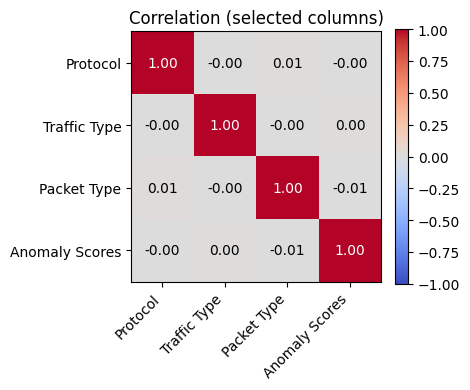

In [33]:
specific_cols = ['Protocol', 'Traffic Type', 'Packet Type', 'Anomaly Scores']  # set what you want

# keep only columns that exist in df
available_cols = [c for c in specific_cols if c in df.columns]
if not available_cols:
    raise ValueError(f"None of the requested columns found in df: {specific_cols}")

# build a subset and convert non-numeric columns to numeric codes so corr() uses them too
df_subset = df[available_cols].copy()
non_numeric = df_subset.select_dtypes(exclude='number').columns.tolist()
for col in non_numeric:
    codes = pd.factorize(df_subset[col], sort=True)[0]
    # factorize uses -1 for NaN; replace with pandas NA so corr ignores missing
    df_subset[col] = pd.Series(codes, index=df_subset.index).replace(-1, pd.NA).astype(float)

# compute correlation on the prepared subset
corr = df_subset.corr()
print("Correlation matrix (selected columns -> non-numeric columns factorized):")
print(corr)

# plot heatmap
n = len(corr.columns)
fig, ax = plt.subplots(figsize=(max(4, n * 1.2), max(4, n * 1.2)))
im = ax.imshow(corr.values, cmap='coolwarm', vmin=-1, vmax=1, aspect='equal')

ax.set_xticks(range(n))
ax.set_yticks(range(n))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.index)

# annotate
for i in range(n):
    for j in range(n):
        val = corr.iat[i, j]
        ax.text(j, i, f"{val:.2f}" if pd.notna(val) else "nan", ha='center', va='center',
                color='white' if abs(val) > 0.5 else 'black')

plt.title('Correlation (selected columns)')
plt.colorbar(im, ax=ax, fraction=0.046)
plt.tight_layout()
plt.show()

accuracy report:
0.3331
accuracy percentage = 33.31 %


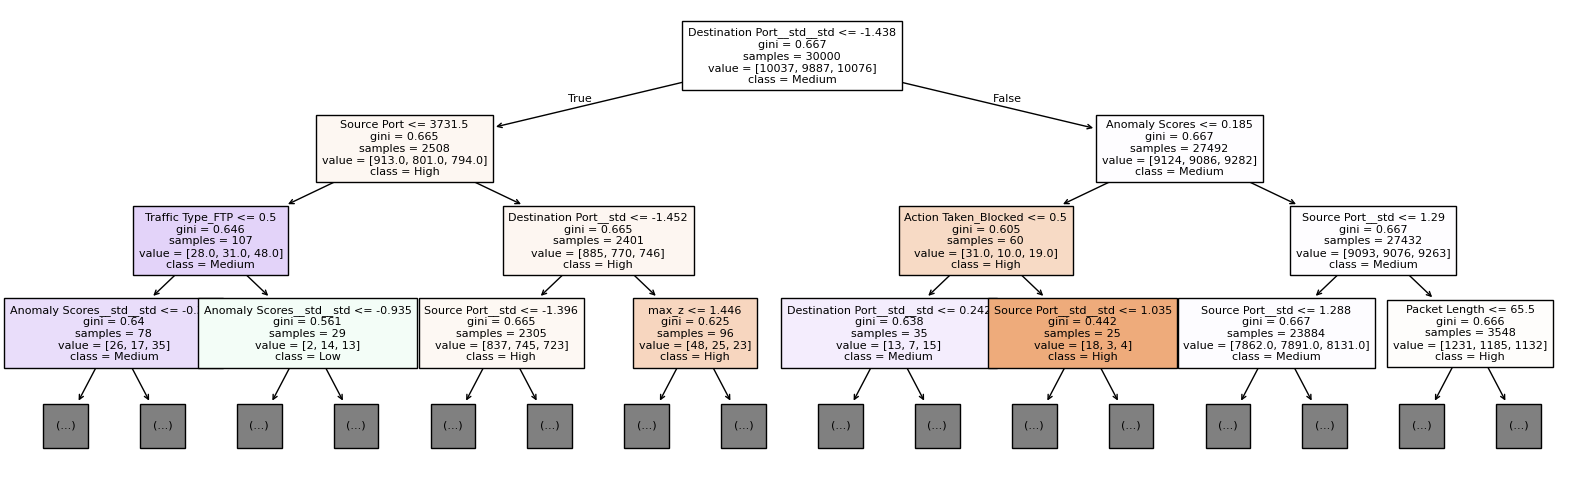

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree

#choose target 
target = 'Severity Level'

if target not in df.columns:
    raise ValueError(f"target column {target} not found in dataset")

#identify y
y = df[target]

#feature selection 

num_cols = df.select_dtypes(include='number').columns.tolist() #All numeric column
cat_cols = [c for c in df.select_dtypes(include=object).columns if c != target] # obj_type columns excluding target 
cat_to_use = [c for c in cat_cols if df[c].nunique() <= 20] #limit cardinality

#build x with numeric + One_hot (feature selection)

x_part = []

if num_cols:
    x_part.append(df[num_cols])
if cat_to_use:#to convert categorical variables into a format suitable for machine learning(binary)
    x_part.append(pd.get_dummies(df[cat_to_use].astype(str), dummy_na=True))

#identify x
x = pd.concat(x_part, axis=1)

# train/test split
try:
    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.25, stratify=y, random_state=42
    )
except ValueError:
    # fallback if stratify not possible (like 'single class')
    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.25, random_state=42
    )

# train a small tree with (adjust max_depth as needed)

clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train, y_train) # for best split

# evaluate
y_pred = clf.predict(X_test)

print('accuracy report:')
print(metrics.accuracy_score(y_test, y_pred))
accuracy_percentage = metrics.accuracy_score(y_test, y_pred) * 100
print(f'accuracy percentage = {accuracy_percentage} %')

# plot a shallow version of the tree

plt.figure(figsize=(20, 6))
plot_tree(clf, max_depth=3, feature_names=x.columns, class_names=clf.classes_, filled=True, fontsize=8)
plt.show()
